In [6]:
import os
import collections
import json

import numpy as np
import pandas as pd
import seaborn as sns
import lovelyplots
import matplotlib.pyplot as plt

plt.style.use('ipynb')
# sns.set_style(style="darkgrid")

In [7]:
def find_dataset(results_file: str) -> str:
    for dataset in ["rmd17", "3bpa"]:
        if dataset in results_file:
            return dataset
    raise ValueError(f"Could not find dataset in {results_file}")

def format_results_file_name(results_file: str) -> str:
    if results_file.startswith("vsh-4channelold"):
        return "Old VGTP + GTP (4-channel)"

    if results_file.startswith("vsh-activations"):
        return "VGTP + GTP (4-channel) + Activations"

    if results_file.startswith("vsh-4channel"):
        return "VGTP + GTP (4-channel)"
    
    if results_file.startswith("vsh-8-channel") or results_file.startswith("vsh-8channel"):
        return "VGTP + GTP (8-channel)"
    
    if results_file.startswith("gaunt-s2grid"):
        return "GTP (S2 Grid)"
    
    if results_file.startswith("gaunt-orig"):
        return "GTP (Original)"
    
    return results_file
    raise ValueError(f"Unknown results file: {results_file}")


def format_dataset_name(dataset: str) -> str:
    if dataset == "3bpa":
        return "3BPA"
    if dataset == "rmd17":
        return "RMD17"

def format_metric_name(metric_name: str) -> str:
    if metric_name == "rmse_f":
        return "RMSE (Force)"
    
    if metric_name == "rmse_e":
        return "RMSE (Energy)"

In [8]:
# Read all train results.
all_results = collections.defaultdict(list)
results_dirs = [
    # "/home/ameyad/Gaunt-Tensor-Product/force-field-modeling-3bpa/results/rigorous",
    "/home/ameyad/Gaunt-Tensor-Product/force-field-modeling-3bpa/results/",
]

for results_dir in results_dirs:

    for results_file in os.listdir(results_dir):
        if not results_file.endswith("train.txt"):
            continue

        print(f"Reading {results_file}")
        with open(f"{results_dir}/{results_file}", "r") as f:
            for line in f:
                results = json.loads(line)
                if results.get("mode") != "eval":
                    continue
                if results.get("epoch") == 0 and len(all_results[results_file]) > 0:
                    break
                if results.get("epoch") > 1000:
                    break
                # print(results)
                all_results[results_file].append(results)

all_results_dfs = {}
for results_file, results in all_results.items():
    all_results_dfs[results_file] = pd.DataFrame(results)
    # Add a column for the filename.
    all_results_dfs[results_file]["name"] = os.path.splitext(results_file)[0]
    all_results_dfs[results_file]["name_formatted"] = all_results_dfs[results_file]["name"].apply(format_results_file_name)
    all_results_dfs[results_file]["dataset"] = find_dataset(results_file)

all_results_dfs = pd.concat(all_results_dfs.values())
all_results_dfs

Reading vsh-4channelold-3bpa_run-6_train.txt
Reading vsh-4channel-se3-3bpa_run-6_train.txt


,loss,mae_e,mae_f,rmse_e,rmse_f,q95_e,q95_f,time,mode,epoch,name,name_formatted,dataset
0,43.415669,0.106992,0.151605,0.135029,0.208363,0.252148,0.421253,2.553570,eval,0,vsh-4channelold-3bpa_run-6_train,Old VGTP + GTP (4-channel),3bpa
1,7.286149,0.032539,0.061472,0.043000,0.085359,0.092871,0.174122,1.048684,eval,2,vsh-4channelold-3bpa_run-6_train,Old VGTP + GTP (4-channel),3bpa
2,3.958146,0.028320,0.043953,0.035629,0.062913,0.069629,0.130197,1.048110,eval,4,vsh-4channelold-3bpa_run-6_train,Old VGTP + GTP (4-channel),3bpa
3,2.908480,0.024805,0.037252,0.030062,0.053930,0.053125,0.112902,1.054388,eval,6,vsh-4channelold-3bpa_run-6_train,Old VGTP + GTP (4-channel),3bpa
4,2.291591,0.024883,0.033195,0.029786,0.047870,0.053125,0.100784,1.047024,eval,8,vsh-4channelold-3bpa_run-6_train,Old VGTP + GTP (4-channel),3bpa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.167718,0.004531,0.008722,0.005781,0.012951,0.010840,0.027579,1.011251,eval,342,vsh-4channel-se3-3bpa_run-6_train,VGTP + GTP (4-channel),3bpa
172,0.167226,0.004453,0.008698,0.005510,0.012932,0.009766,0.027742,1.045858,eval,344,vsh-4channel-se3-3bpa_run-6_train,VGTP + GTP (4-channel),3bpa
173,0.166433,0.004805,0.008695,0.005814,0.012901,0.009766,0.027600,1.054698,eval,346,vsh-4channel-se3-3bpa_run-6_train,VGTP + GTP (4-channel),3bpa
174,0.166229,0.004375,0.008709,0.005441,0.012893,0.009766,0.027317,1.077778,eval,348,vsh-4channel-se3-3bpa_run-6_train,VGTP + GTP (4-channel),3bpa


/tmp/ipykernel_1171276/3561931047.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


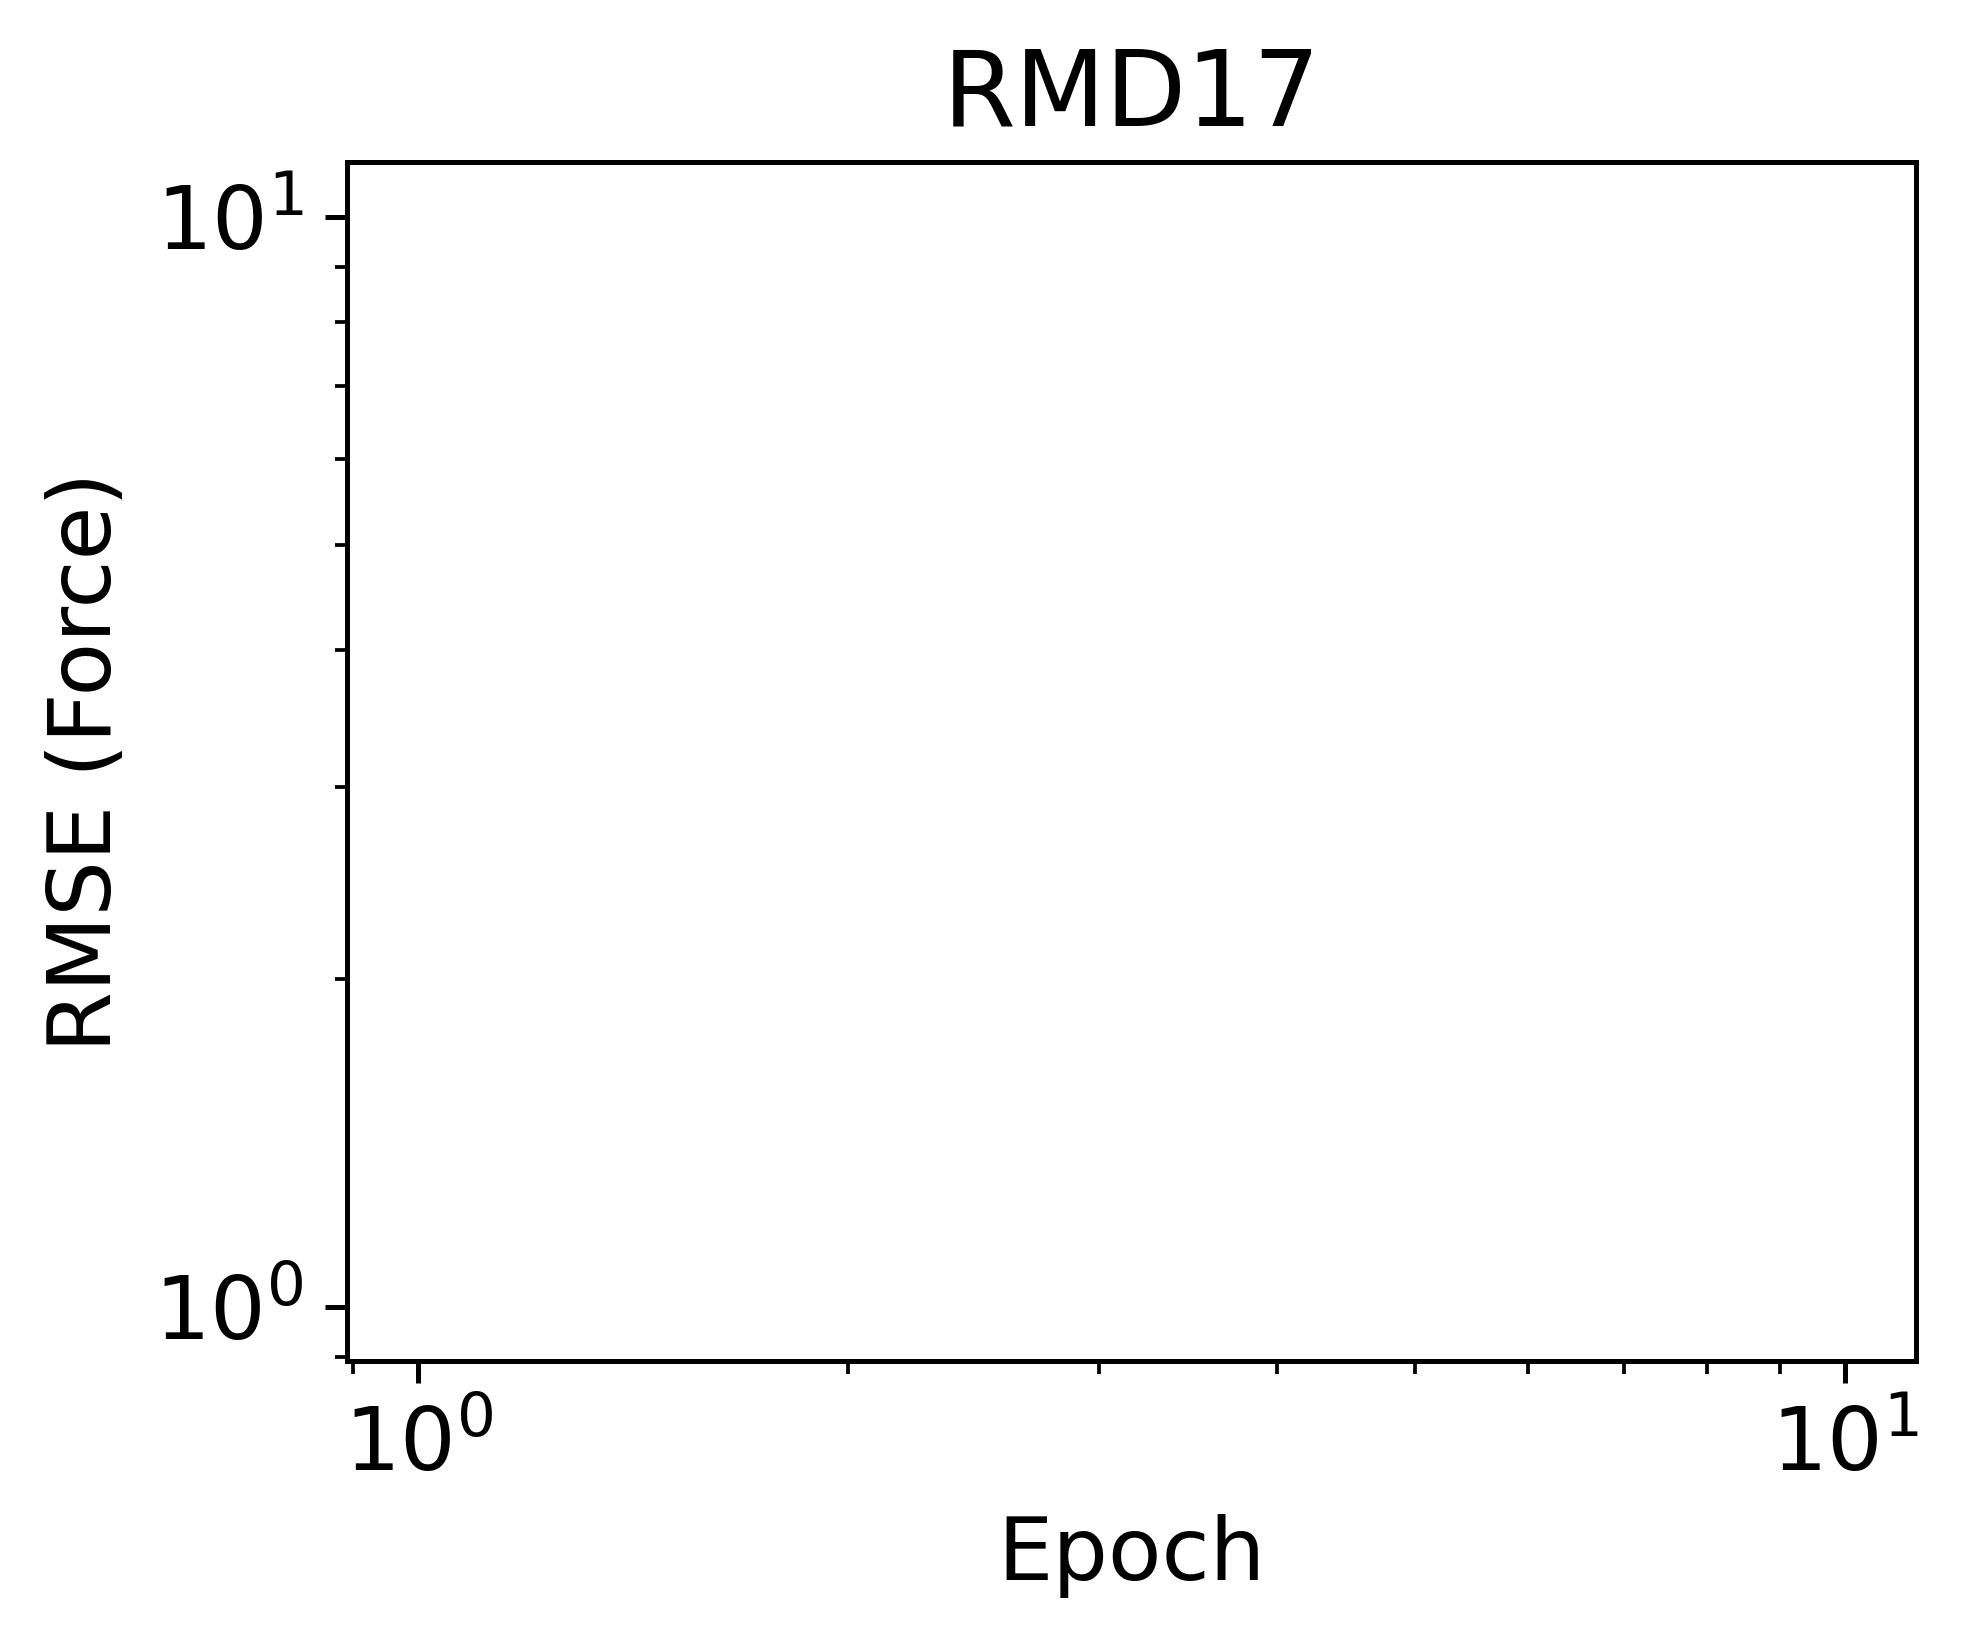

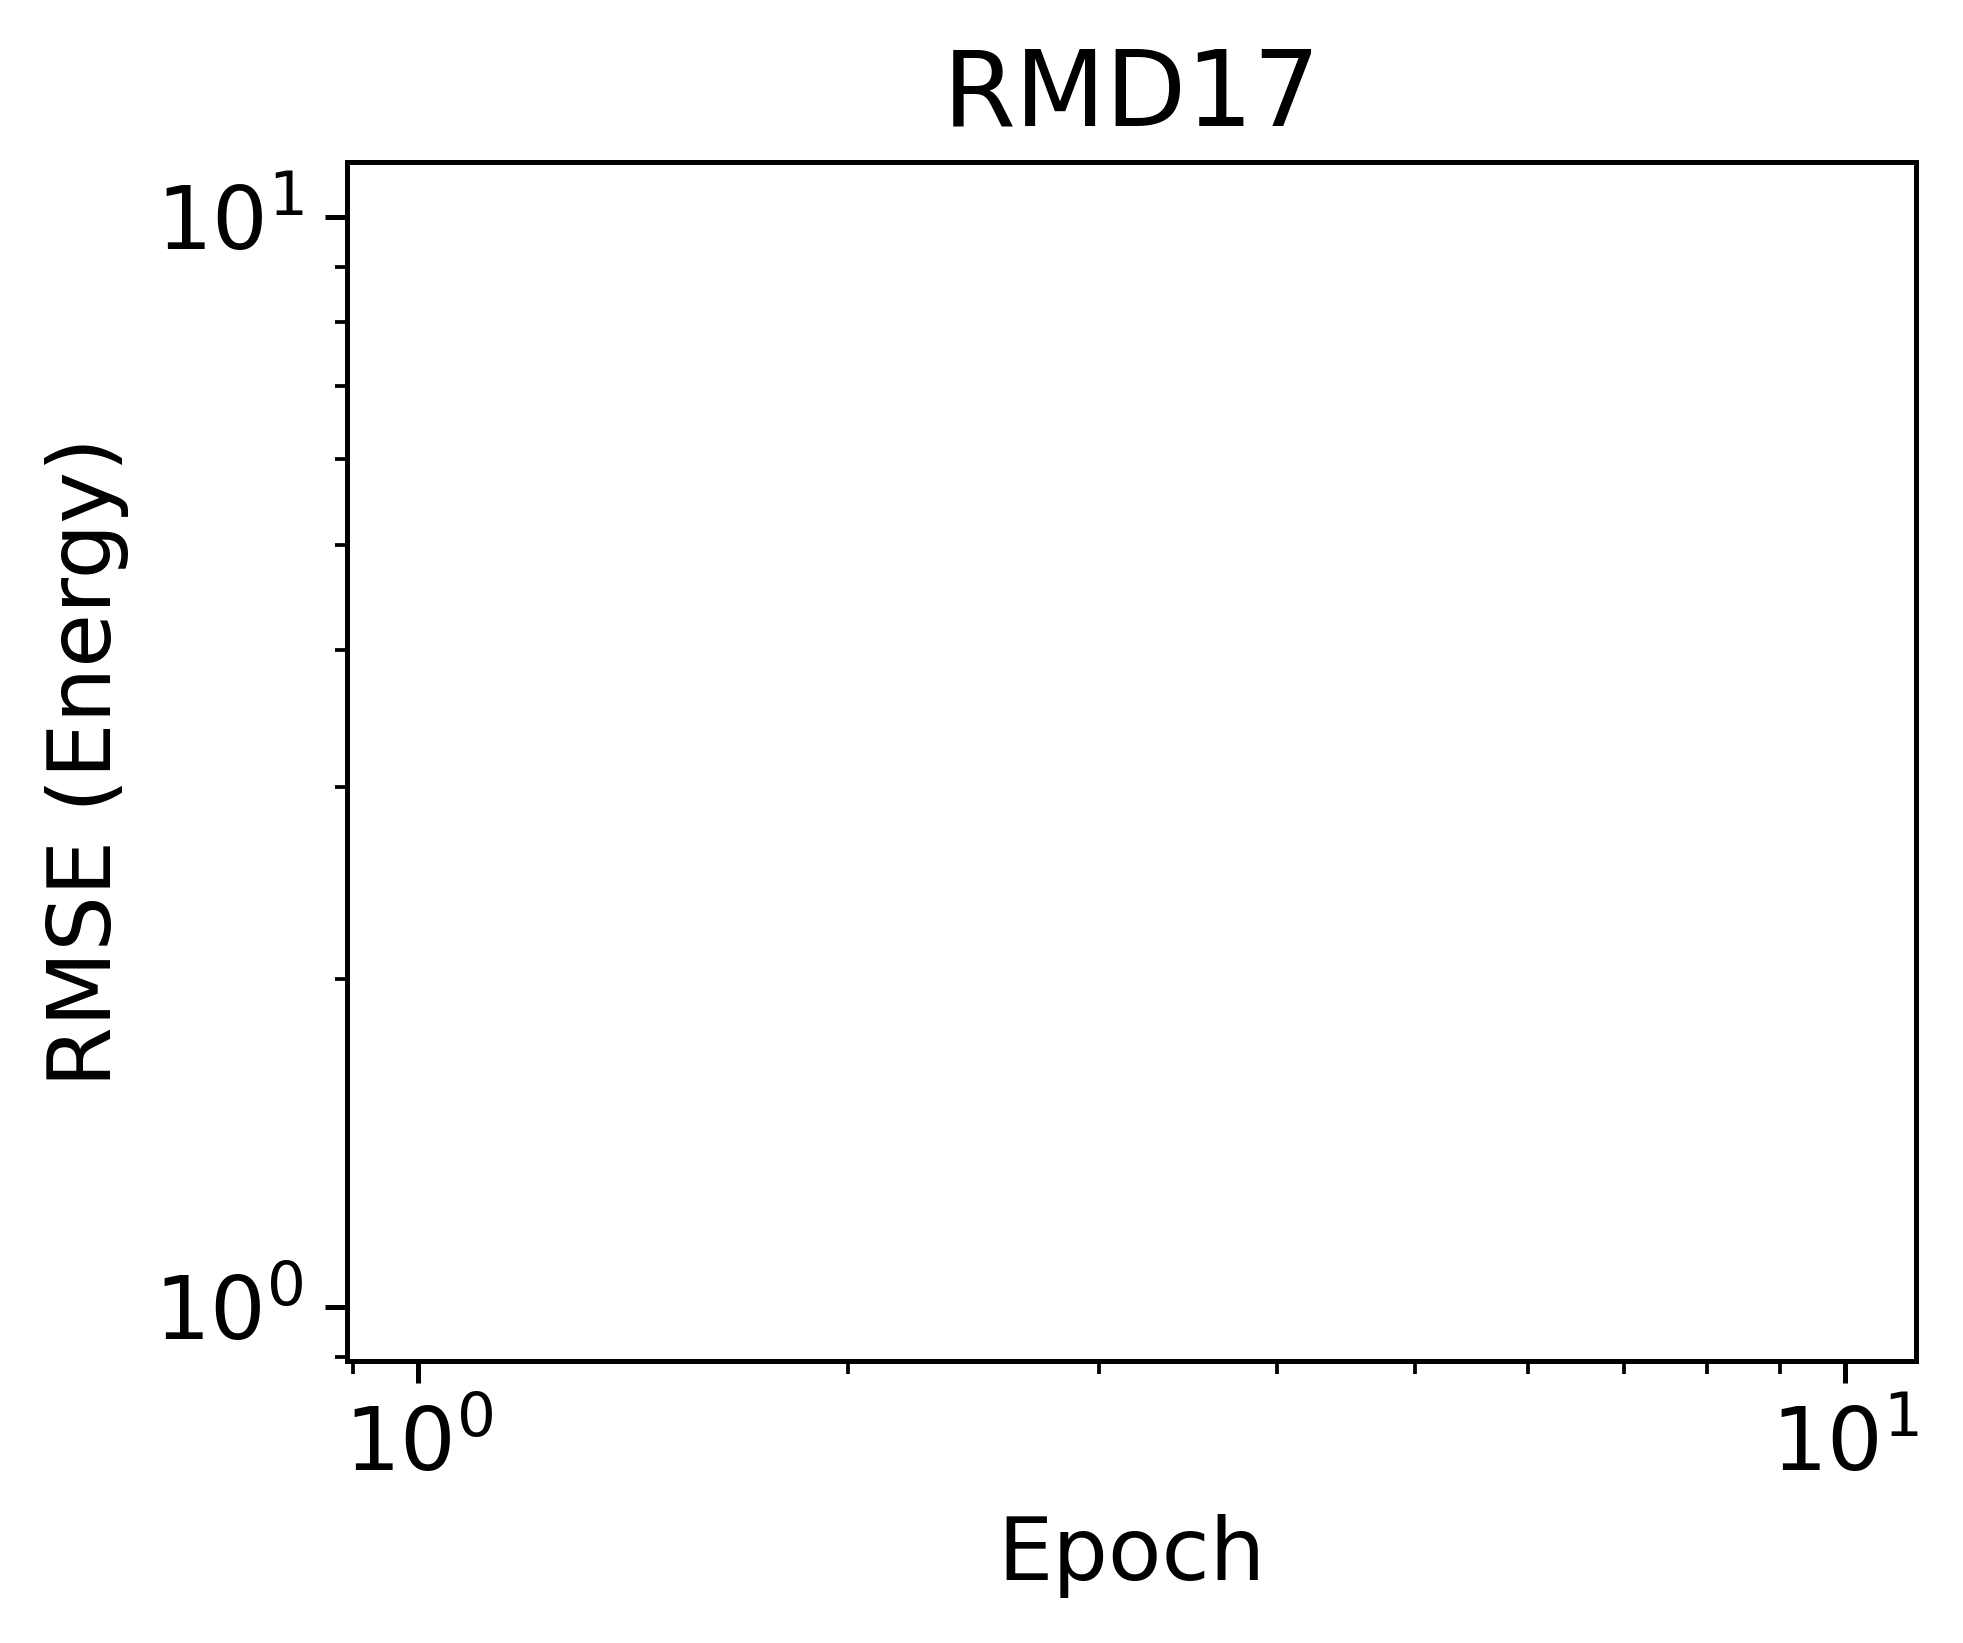

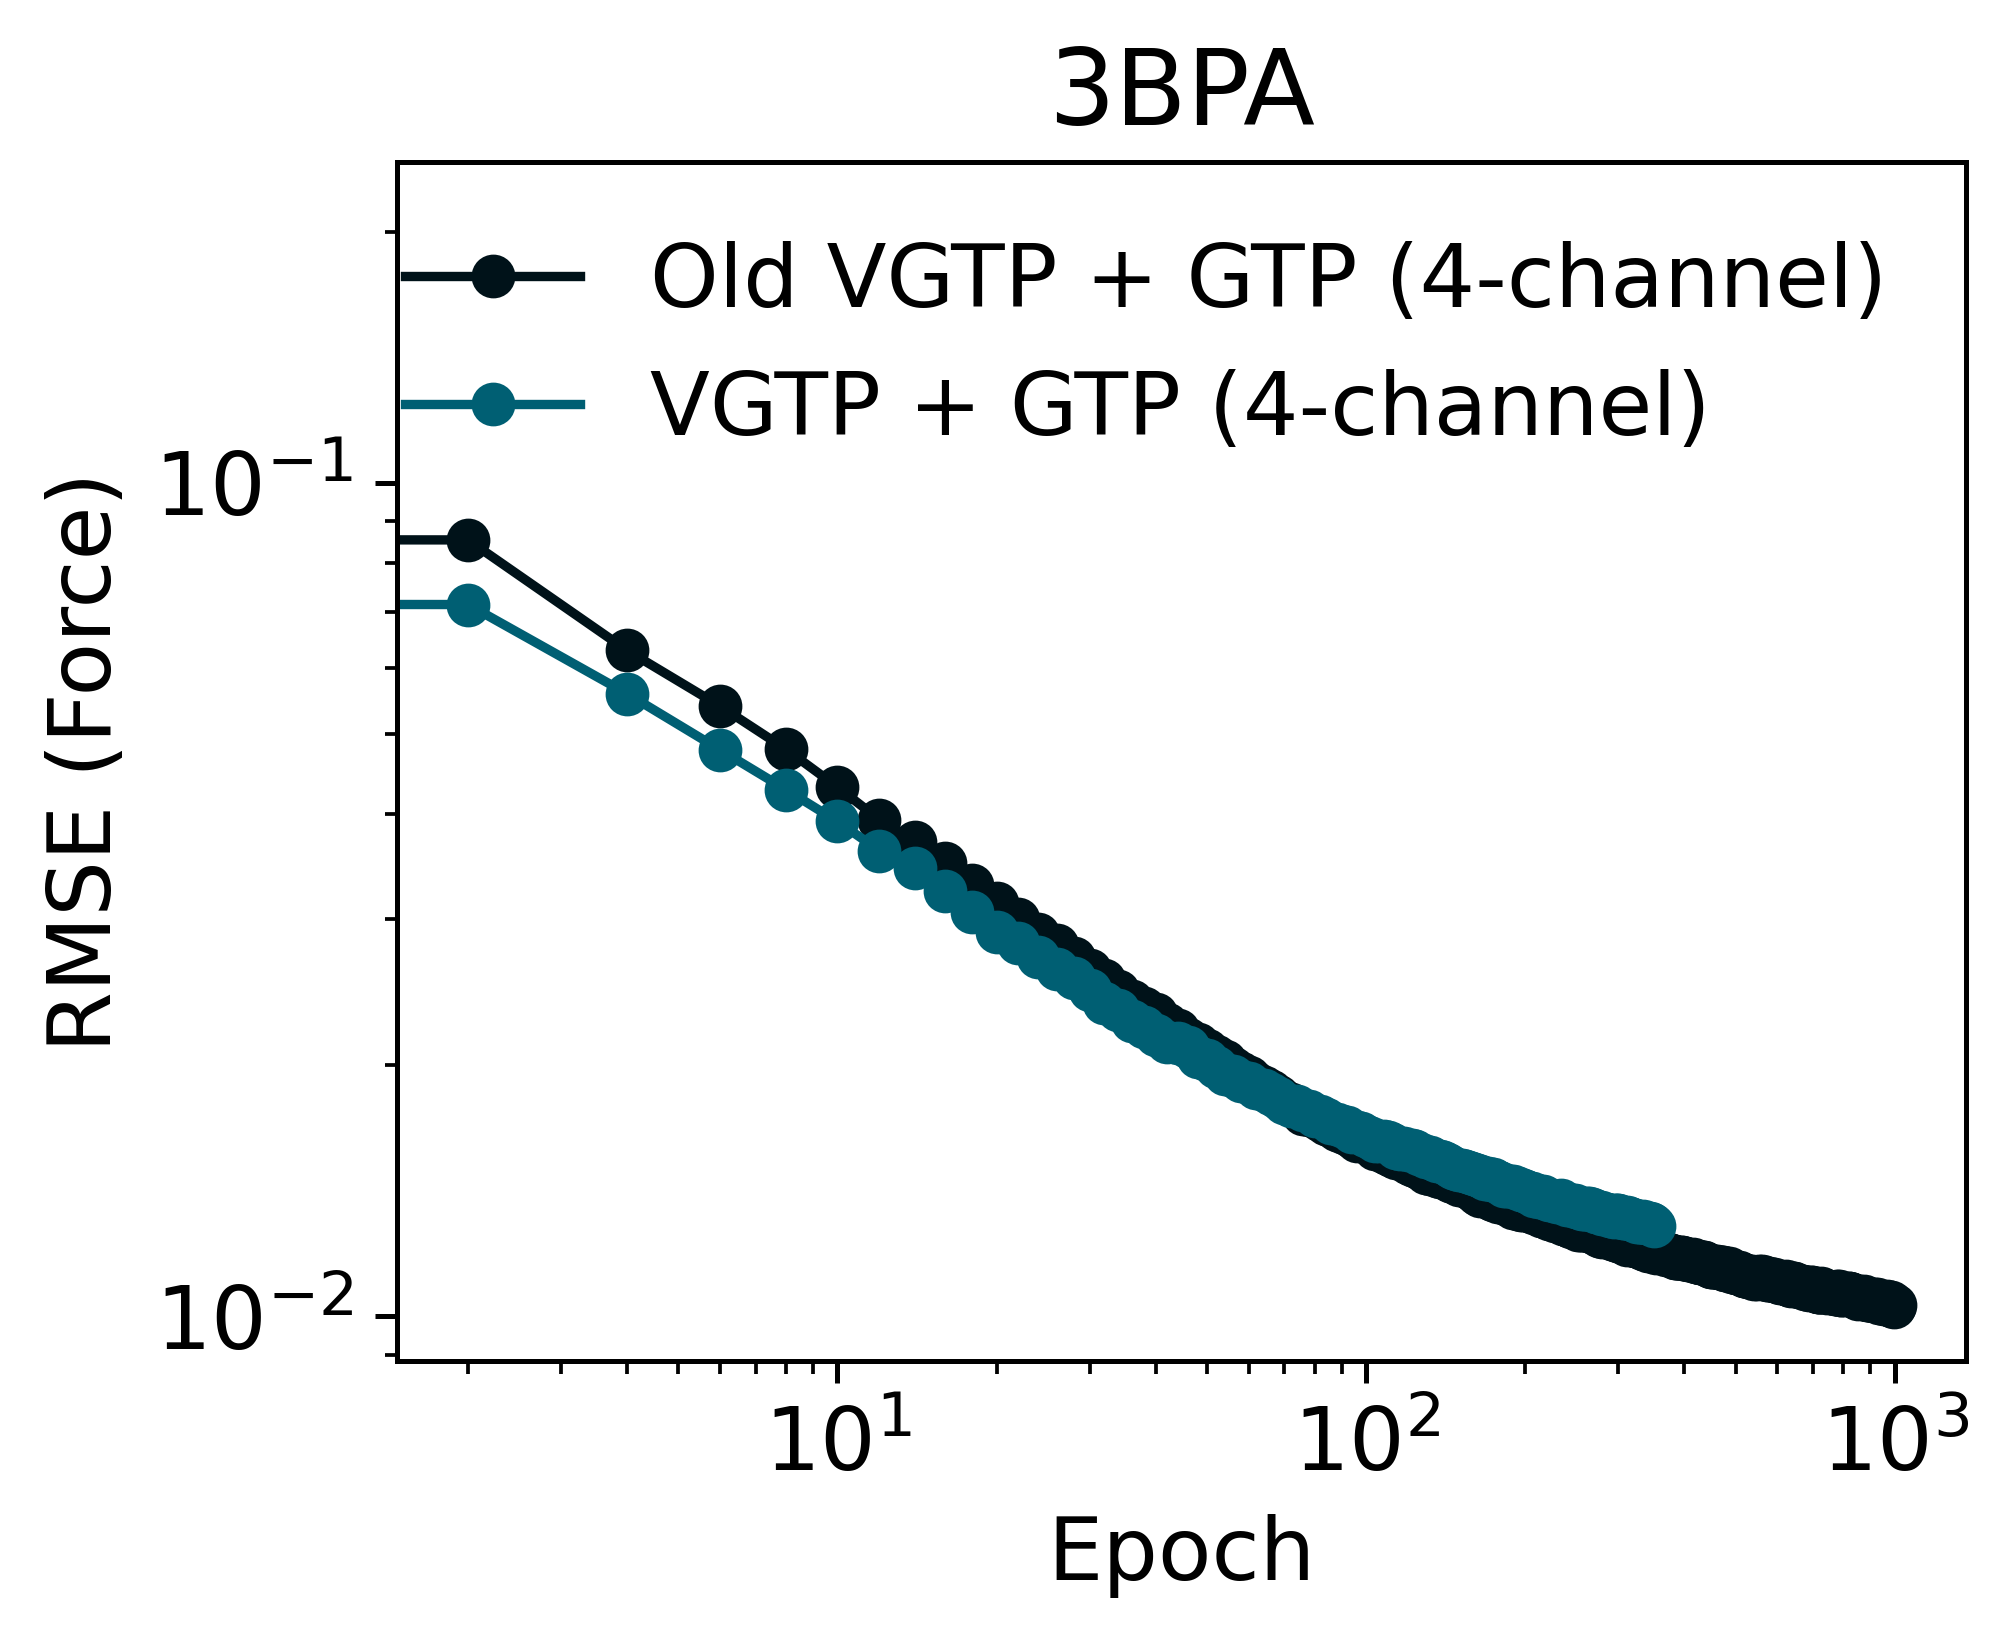

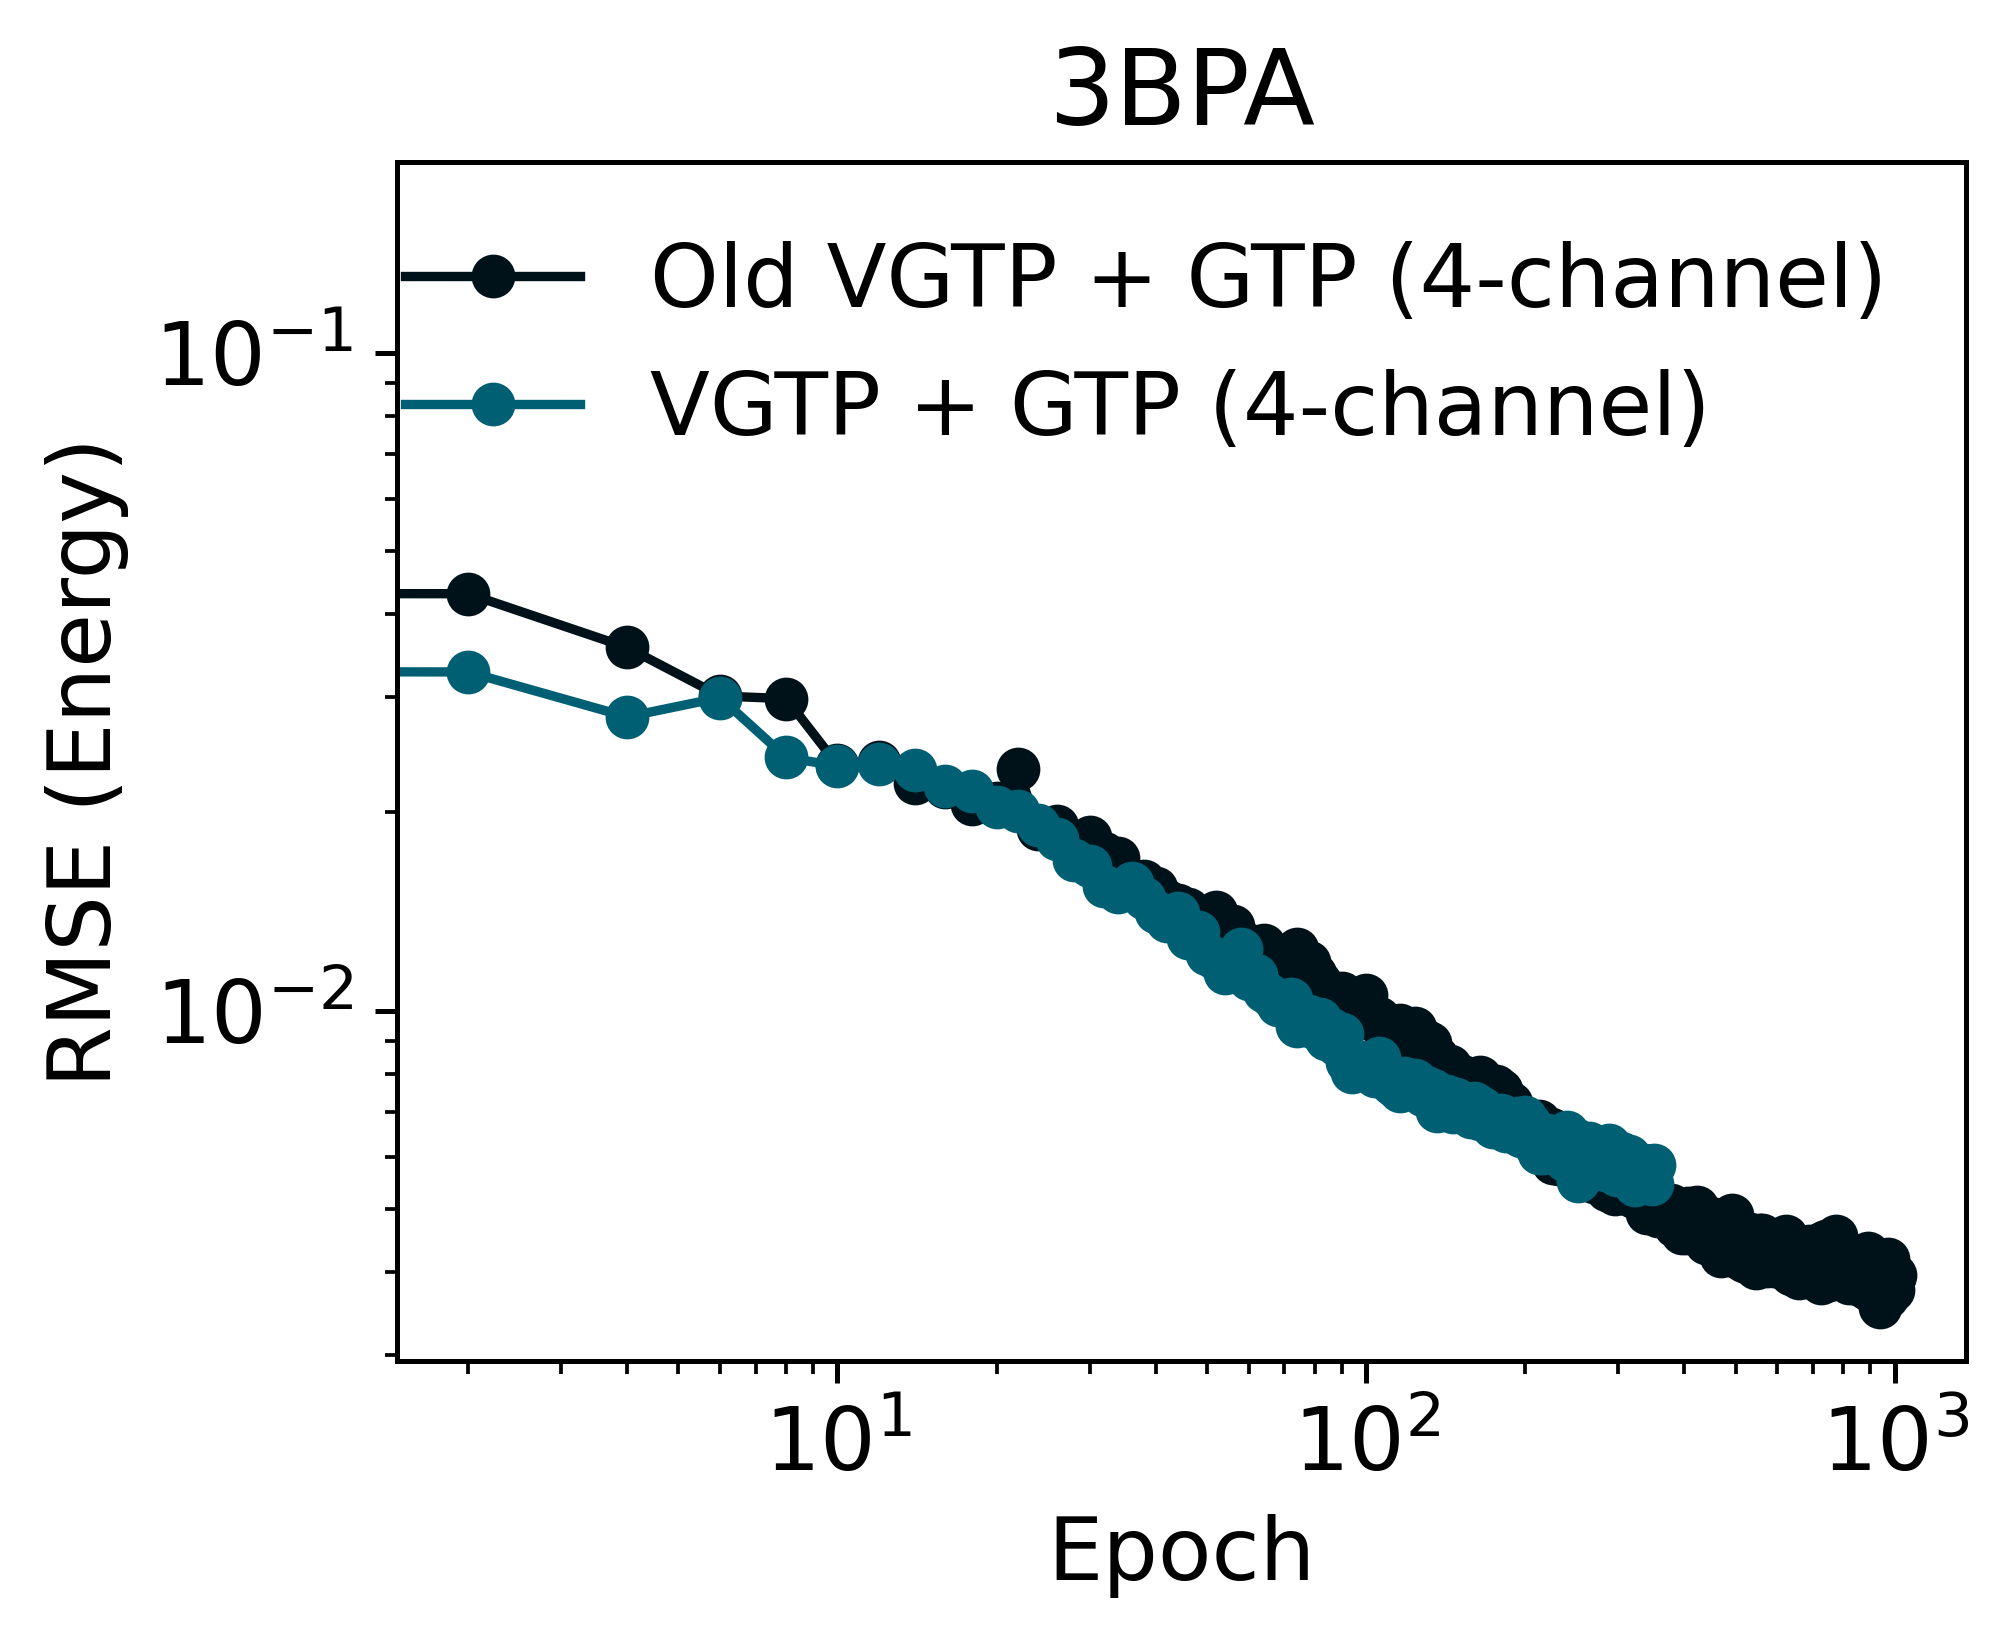

In [9]:
for dataset in ["rmd17", "3bpa"]:
    dataset_df = all_results_dfs[all_results_dfs["dataset"] == dataset]
    for metric_name in ["rmse_f", "rmse_e"]:
        plt.figure()
        for results_file in dataset_df["name"].unique():
            df = dataset_df[(dataset_df["name"] == results_file)]
            plt.plot(df["epoch"], df[metric_name], label=format_results_file_name(results_file))
        plt.yscale('log')
        plt.xlabel('Epoch')
        plt.xscale('log')
        plt.ylabel(f'{format_metric_name(metric_name)}')
        plt.legend()
        # plt.ticklabel_format(style='plain', axis='x')
        plt.title(f"{format_dataset_name(dataset)}")
        # plt.savefig(f"figures/{dataset}-{metric_name}.png", dpi=500)
        plt.show()


In [10]:
# Read all eval results.
all_eval_results = collections.defaultdict(list)

for results_dir in results_dirs:
    for results_file in os.listdir(results_dir):
        if not results_file.endswith("eval.txt"):
            continue

        print(f"Reading {results_file}")
        with open(f"{results_dir}/{results_file}", "r") as f:
            for line in f:
                results = json.loads(line)
                # print(results)
                all_eval_results[results_file].append(results)

all_eval_results_dfs = {}
for results_file, results in all_eval_results.items():
    all_eval_results_dfs[results_file] = pd.DataFrame(results)
    all_eval_results_dfs[results_file]["dataset"] = find_dataset(results_file)
    all_eval_results_dfs[results_file]["name_formatted"] = format_results_file_name(results_file)

# Make a combined dataframe.
all_eval_results_dfs = pd.concat(all_eval_results_dfs.values())
all_eval_results_dfs

# Sort by name_formatted.
all_eval_results_dfs = all_eval_results_dfs.sort_values("name_formatted")


ValueError: No objects to concatenate

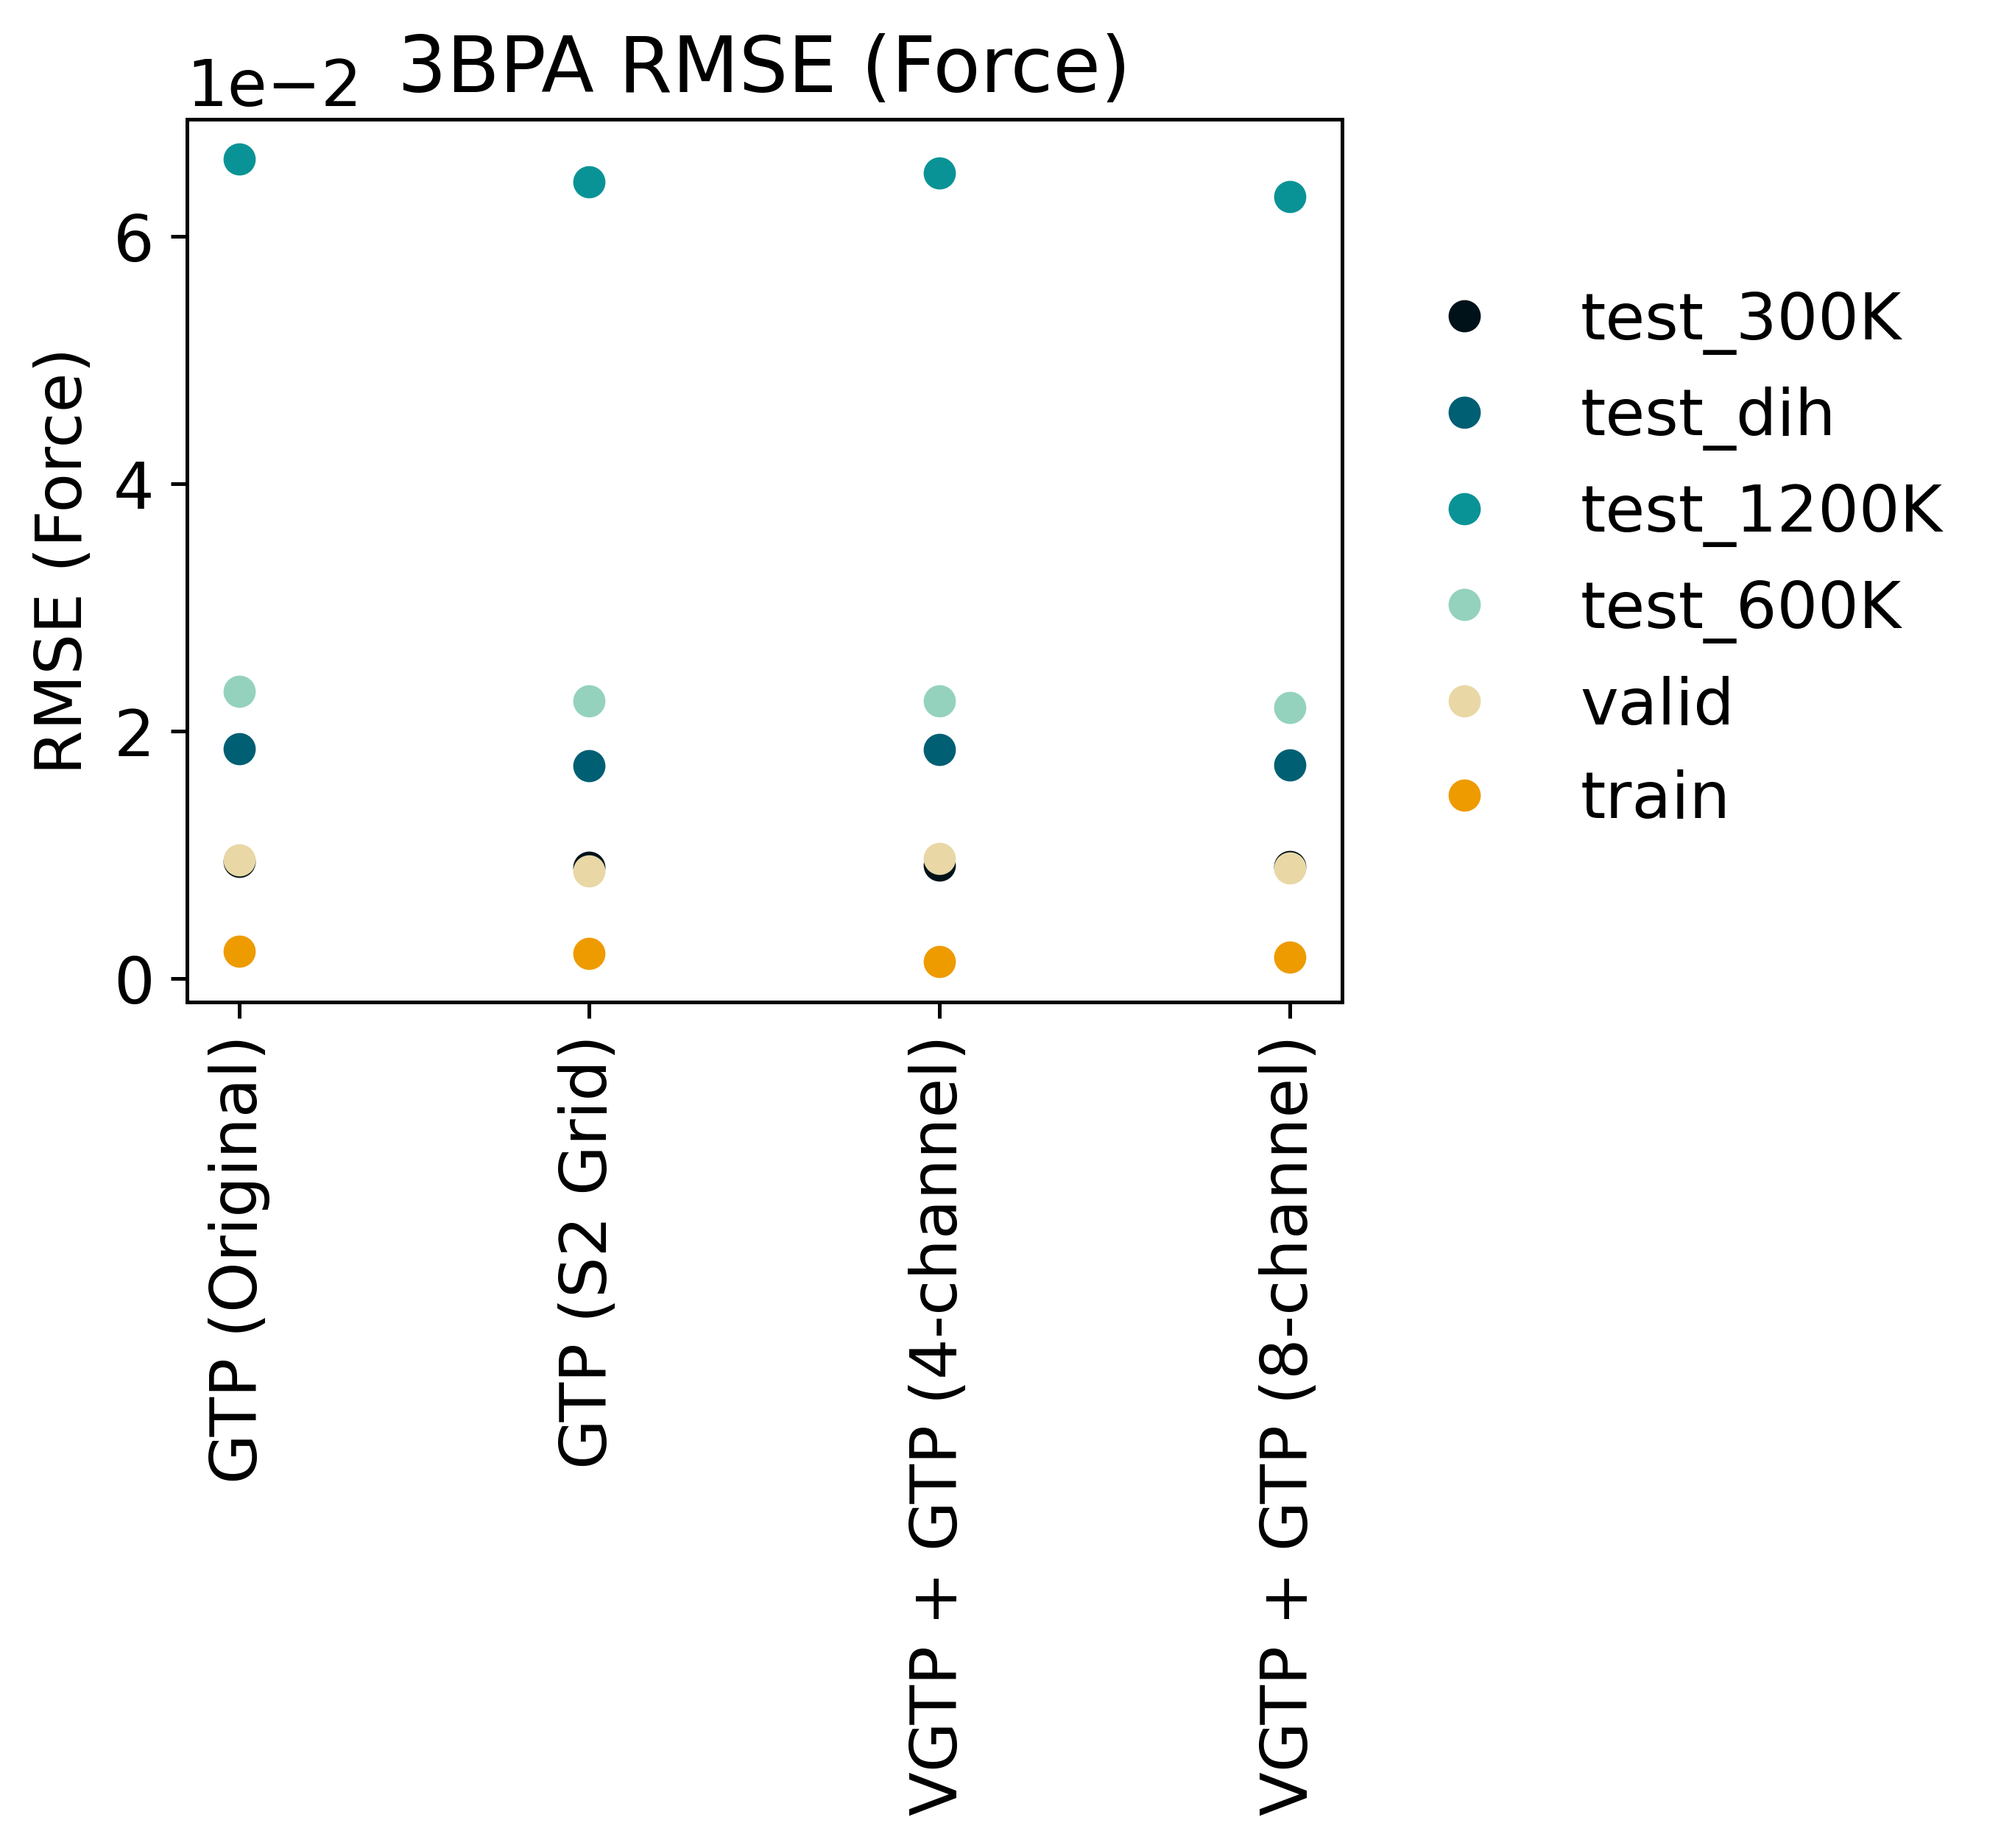

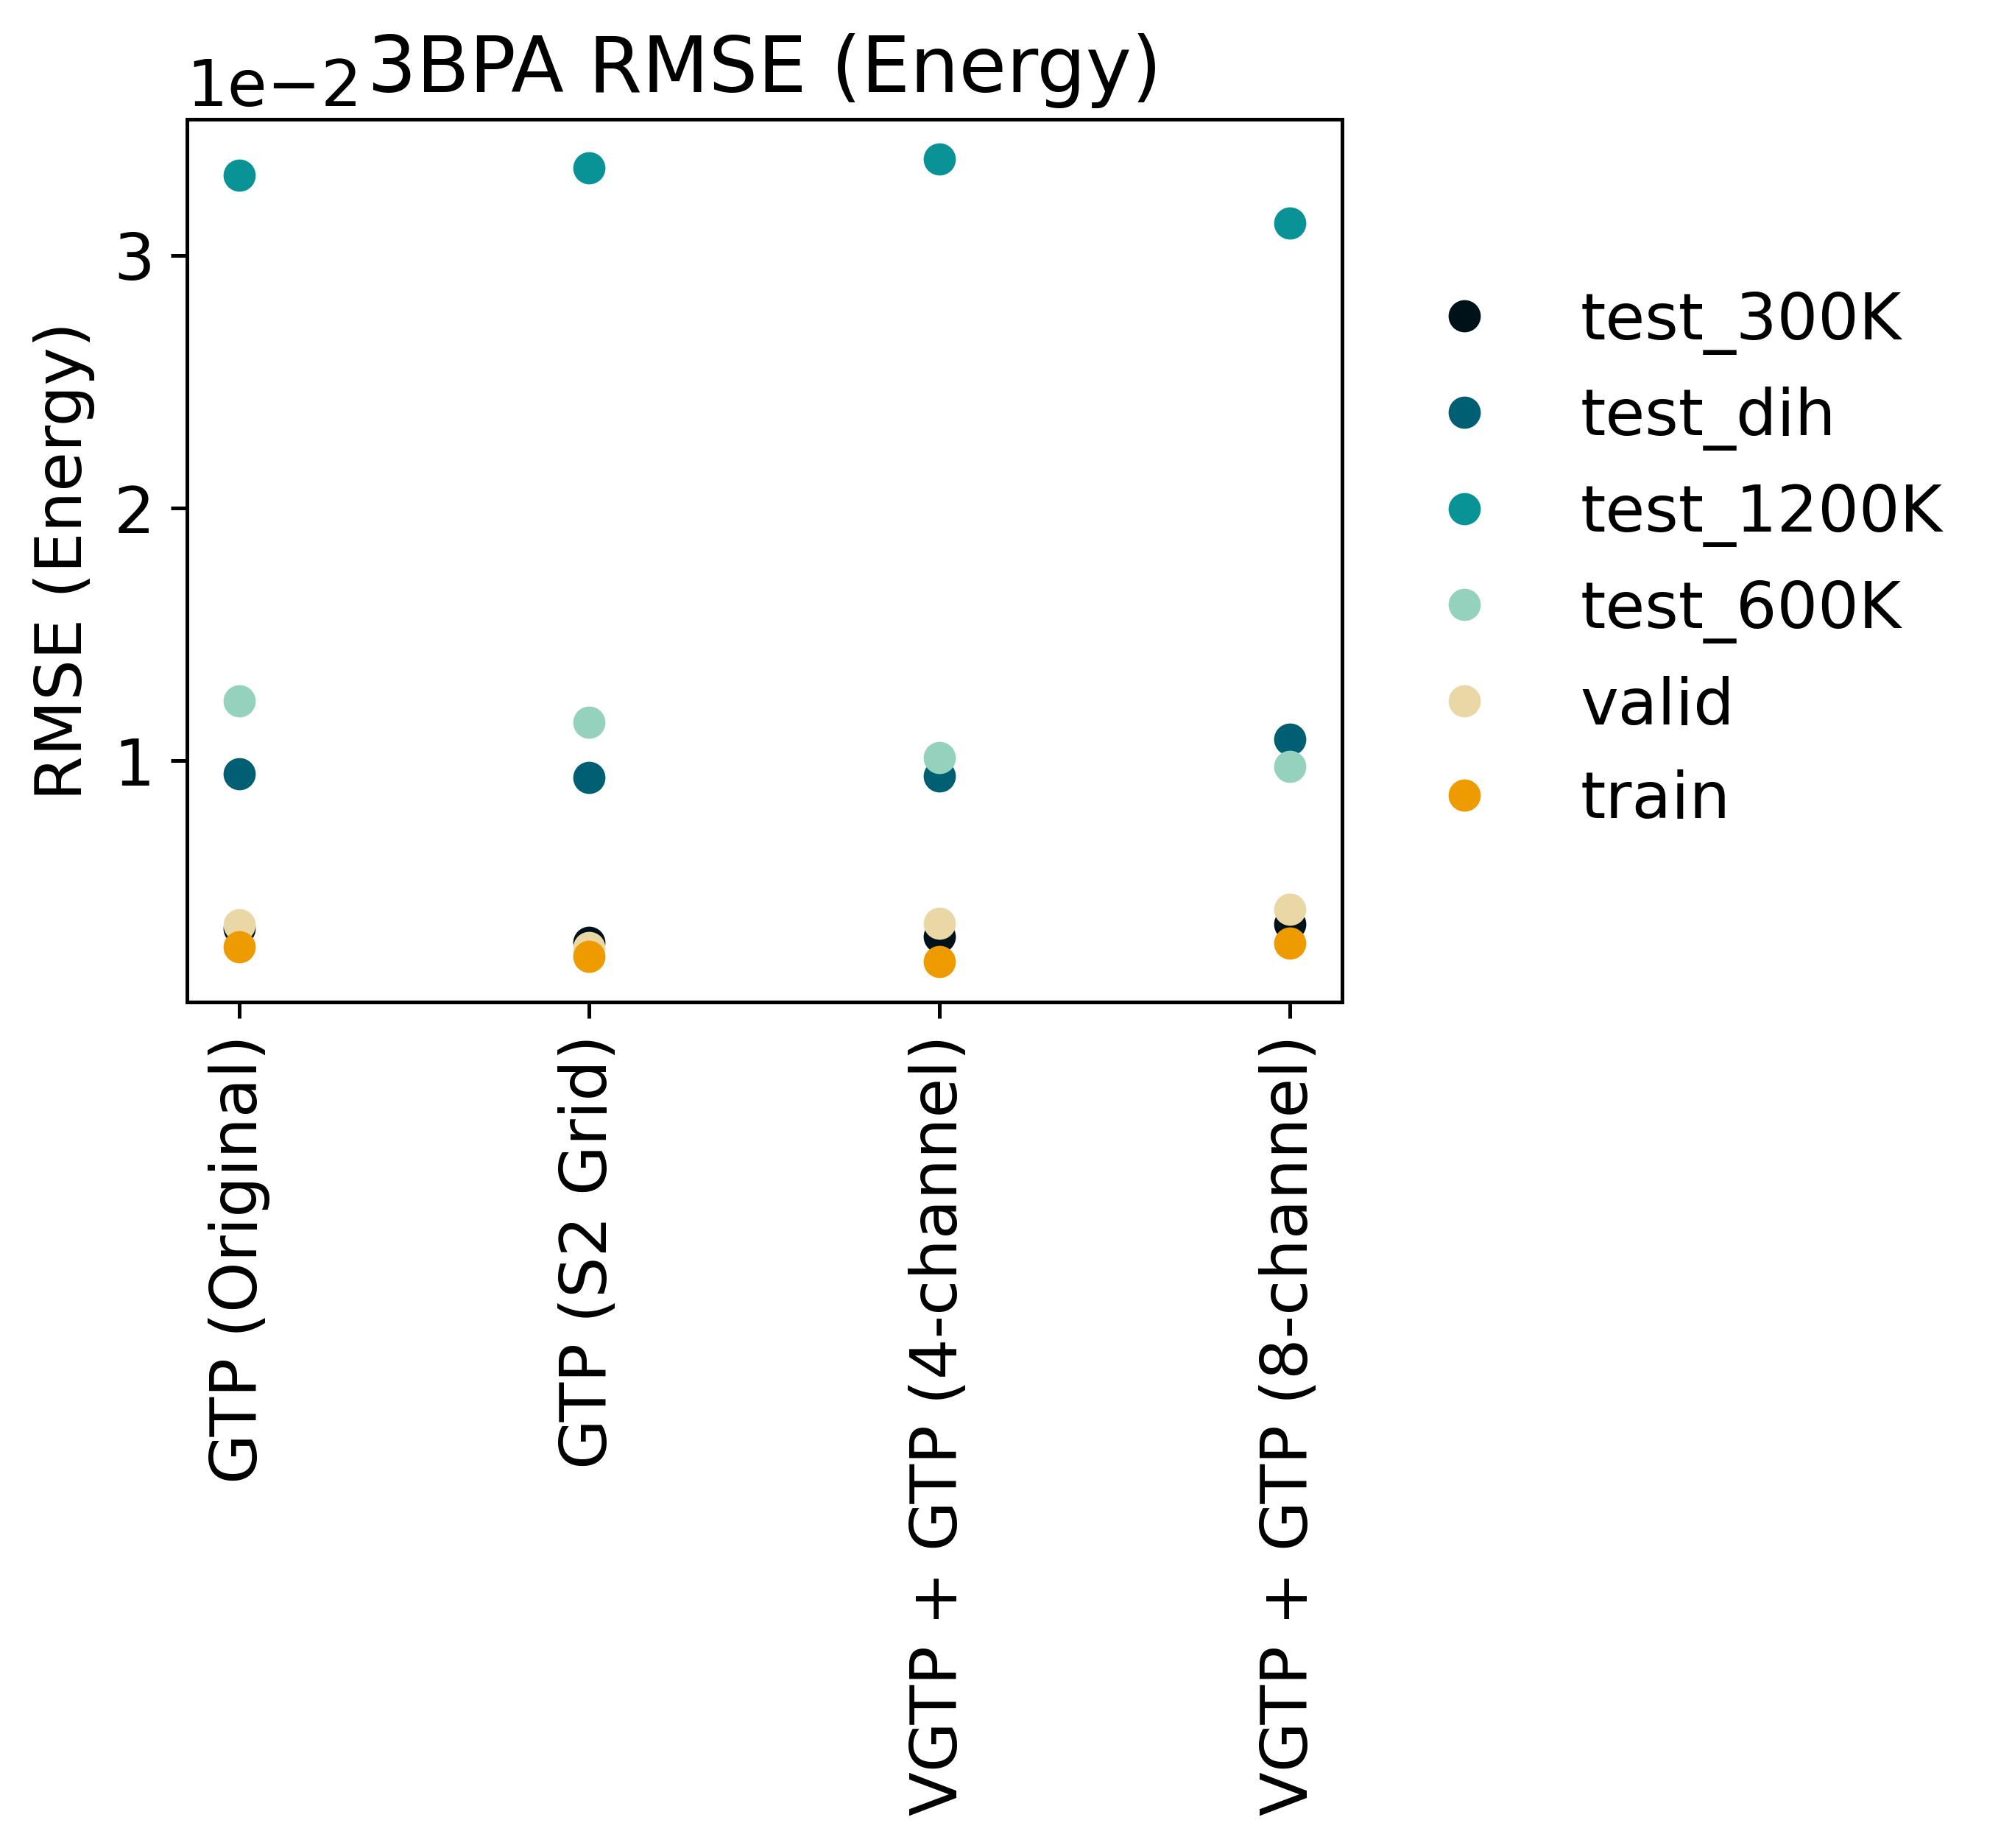

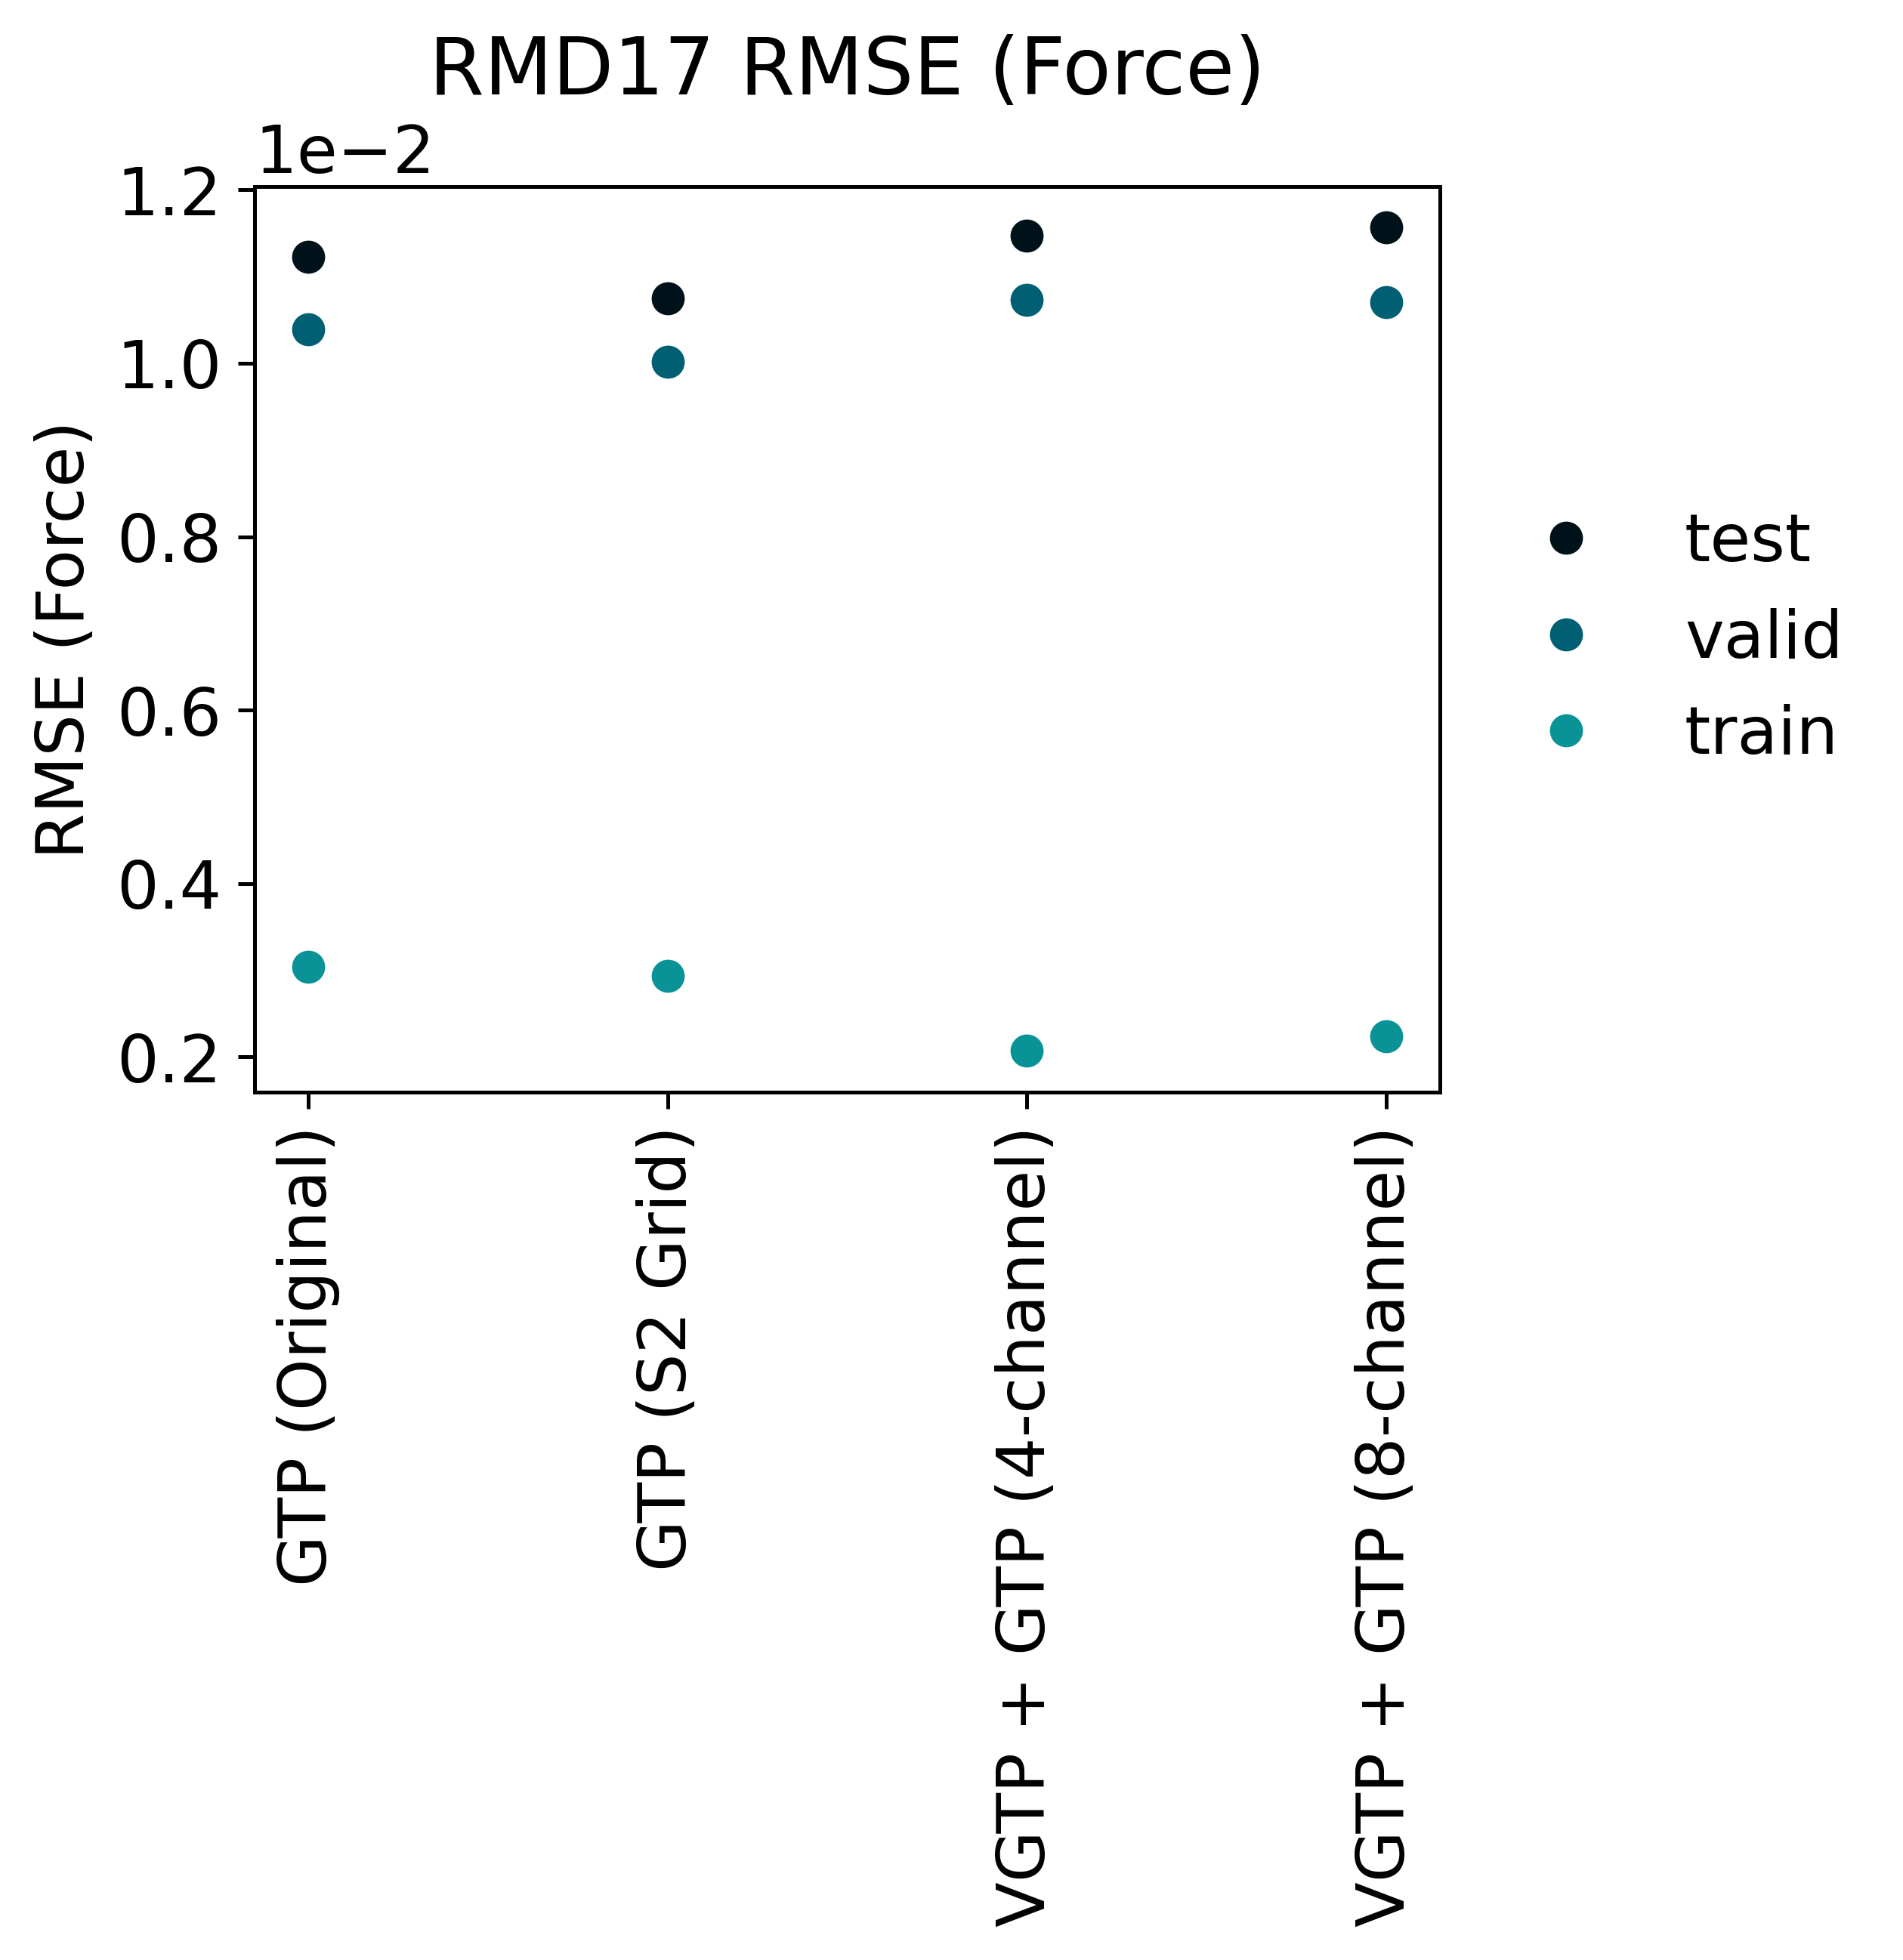

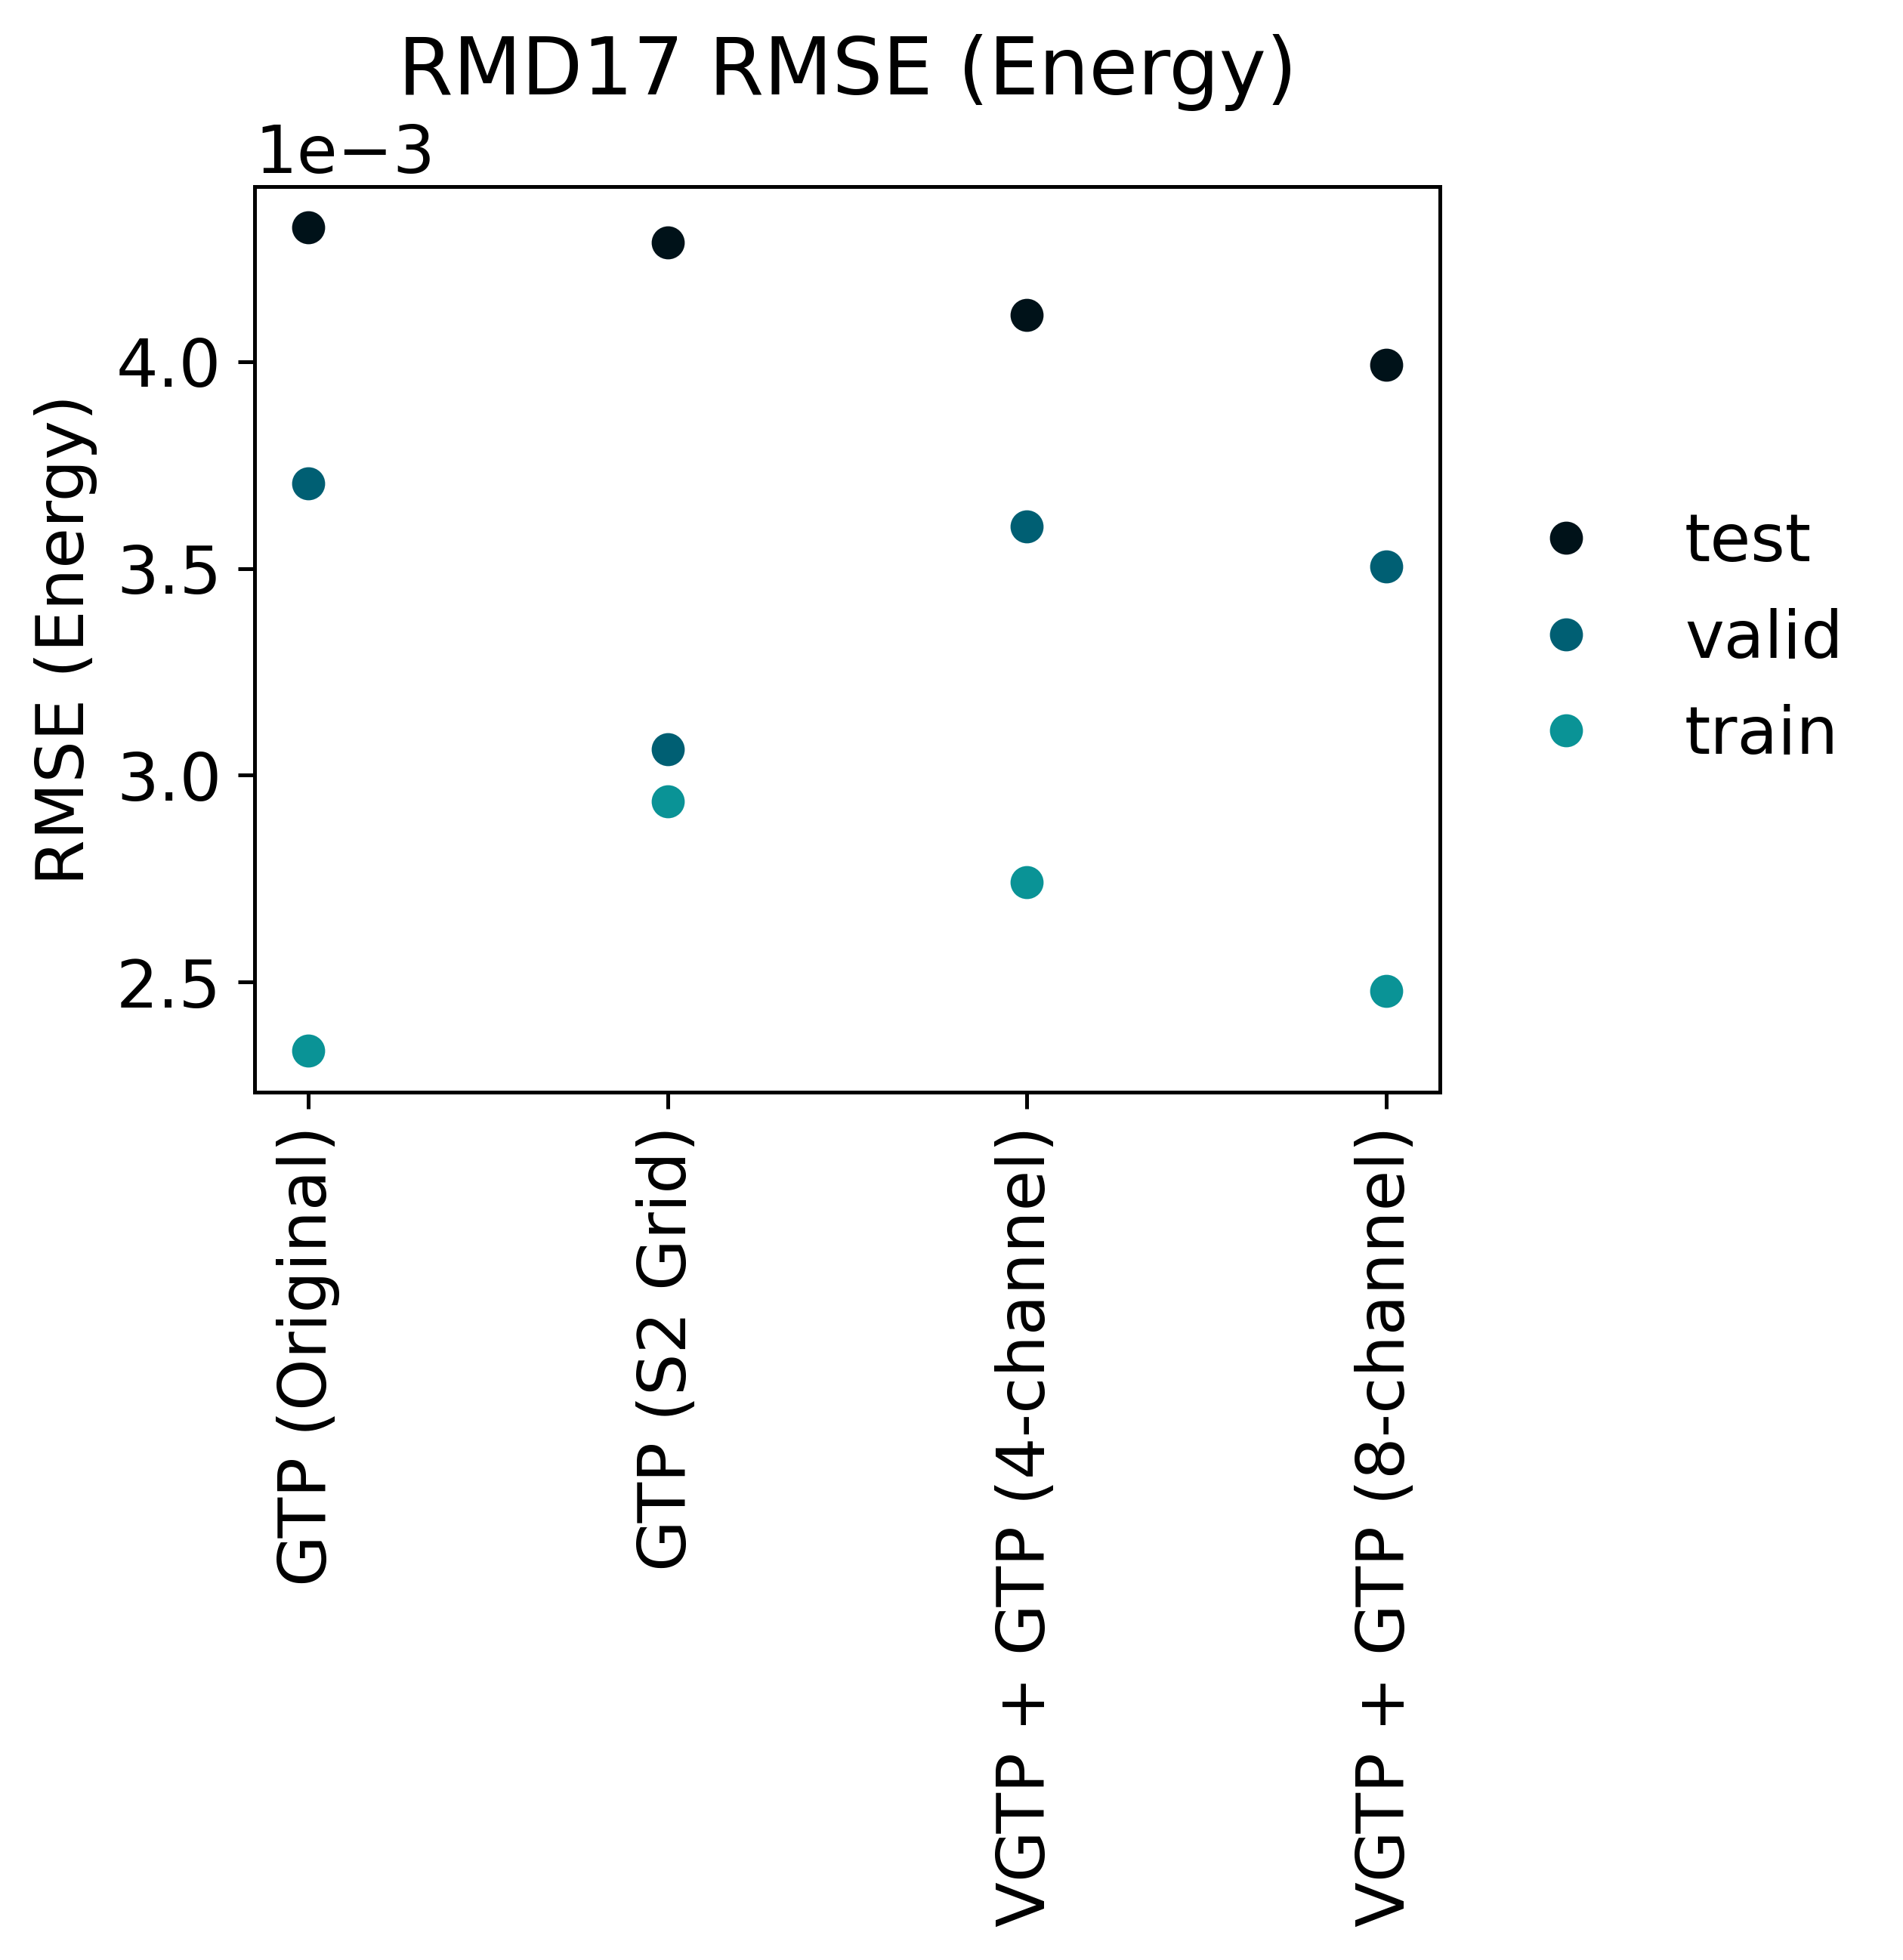

In [20]:
for dataset in all_eval_results_dfs["dataset"].unique():
    dataset_results = all_eval_results_dfs[all_eval_results_dfs["dataset"] == dataset]
    for metric_name in ["rmse_f", "rmse_e"]:
        for subset in dataset_results["subset"].unique():
            subset_results = dataset_results[dataset_results["subset"] == subset]
            plt.plot(subset_results["name_formatted"], subset_results[metric_name], label=subset, marker="o", linestyle="")

        # Place the legend outside the plot.
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xticks(rotation=90)
        plt.ylabel(format_metric_name(metric_name))
        plt.title(f"{format_dataset_name(dataset)} {format_metric_name(metric_name)}")
        plt.show()



In [21]:
for results_file, df in all_eval_results_dfs.items():
    subsets = list(df["subset"])
    break

print(subsets)
for subset in subsets:
    for metric_name in ["rmse_f", "rmse_e"]:
        names = []
        metrics = []
        
        for index, (results_file, df) in enumerate(sorted(all_eval_results_dfs.items())):
            if "3bpa" not in results_file:
                continue
            name = format_results_file_name(results_file)
            metric = float(df[df["subset"] == subset][metric_name])
            metrics.append(metric)
            names.append(name)


        plt.scatter(x=names, y=metrics)
        plt.xticks(
            ticks=range(len(names)),
            labels=names,
            rotation=90
        )
        plt.ylabel(format_metric_name(metric_name))
        plt.title(subset)
        plt.show()
        # print(df[df["subset"] == subset]["rmse_f"])
        # plt.plot(df[df["subset"] == subset]["epoch"], df[df["subset"] == subset]["rmse_e"], label=format_results_file_name(results_file))

KeyError: 'subset'

In [89]:
results_file = "/home/ameyad/Gaunt-Tensor-Product/force-field-modeling-3bpa/results/all_results.txt"
with open(results_file) as f:
    runs = []
    current_run = []
    for line in f.readlines():
        data = json.loads(line)
        
        if len(current_run) > 0:
            last_epoch = current_run[-1]["epoch"]
            if last_epoch != data["epoch"]:
                print(last_epoch, data["epoch"])
            if last_epoch > data["epoch"]:
                print(f"Epoch {last_epoch} is greater than {data['epoch']}")
                runs.append(current_run)
                print(f"Finishing current run at epoch {last_epoch}")
                current_run = []
        
        current_run.append(data)
    
    if len(current_run) > 0:
        runs.append(current_run)
        print(f"Finishing current run at epoch {current_run[-1]['epoch']}")



FileNotFoundError: [Errno 2] No such file or directory: '/home/ameyad/Gaunt-Tensor-Product/force-field-modeling-3bpa/results/all_results.txt'